### Source:

Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France
Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France


### Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


### Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

From Wikipedia: The portion of power that, averaged over a complete cycle of the AC waveform, results in net transfer of energy in one direction is known as active power (more commonly called real power to avoid ambiguity especially in discussions of loads with non-sinusoidal currents). The portion of power due to stored energy, which returns to the source in each cycle, is known as reactive power.

In [1]:
# Import libraries necessary for this project
import csv
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

# Load the dataset
data = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'datetime' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='datetime')

# Success
print("Test dataset has {} data points with {} features each.".format(*data.shape))

Test dataset has 2075259 data points with 7 features each.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [3]:
data.head()

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  
datetime                             
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0

In [5]:
# let's add a column for the unaccounted submetering
data['Sub_metering_4'] = data.apply(lambda x: (x[0]*1000/60) - (x[4] + x[5] + x[6]), axis=1)

In [6]:
# Export the modified dataframe to a csv file
data.to_csv('household_power_consumption_2.csv', float_format='%.4f')

In [7]:
# Reload the dataset
df = data
df.head()

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  Sub_metering_4  
datetime                                             
2006-12-16 17:24:00            17.0       52.266667  
2006-12-16 17:25:00            16.0       72.333333  
2006-12-16 17:26:00            17.0       70.566667  
2006-12-16 17:27:00            17.0       71.800000  
2006-12-16 17:28:00            17.0       43.100000

## Let's use pandas profiling for a quick feature exploration:

In [8]:
pandas_profiling.ProfileReport(df)

### A few observations:
 1. There are about 1.3% missing measurements
 
 2. "Global Intensity" is almost 100% correlated with "Global active power", so we can discard one of them
 
 3. There are lots of zero values in most of the measured features, which is expected because people don't use the appliances 100% of the time
 
 4. "Voltage" seems normally distributed, with a very small standard deviation - also expected (oscillation around 240 V)
 
 5. "Sub_metering_3" has a small number of distinct values, probably because of the discrete power settings of the water heater and AC unit. The same is true about the kitchen and laundry room, to some extent.

### There are different ways to handle the missing data, e.g. extrapolating from the previous values, interpolating between past and future values, etc. For now, I will fill in the missing values with the data from 24 hours ago. I think this is a decent assumption, since there are not too many missing data, and let's assume the usage patterns go through 24hr cycles. I will investigate if I have more time.

In [9]:
np.isnan(df).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Sub_metering_4           25979
dtype: int64

In [10]:
# fill in the missing data by copying the data from 24 hours ago
def fill_missing_values(df):
    hours24 = 24*60
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(df[row, col]):
                df[row, col] = df[row-hours24, col]

In [11]:
fill_missing_values(df.values)
np.isnan(df).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

In [12]:
# Let's check that we've handled the missing values correctly, by looking at April 28, 2007
df.head(190500)

Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
2006-12-16 17:29:00                3.520                  0.522   235.02   
2006-12-16 17:30:00                3.702                  0.520   235.09   
2006-12-16 17:31:00                3.700                  0.520   235.22   
2006-12-16 17:32:00                3.668                  0.510   233.99   
2006-12-16 17:33:00                3.662                  0.510   233.86   
2006-12-16 17:34:00                4.448                  0.498   232.86   
2006-12-16 17:35:00                5.412                  0.470   232.78   
2006-12-16 17:36:00                5.224                  0.478   232.99   
2006-12-16 17:37:00                5.268                  0.398   232.91   
2006-12-16 17:38:00                4.054                  0.422   235.24   
2006-12-16 17:39:00                3.384                  0.282   237.14   
2006-12-16 17:40:00                3.270                  0.152   236.73   
2006-12-16 17:41:00                3.430                  0.156   237.06   
2006-12-16 17:42:00                3.266                  0.000   237.13   
2006-12-16 17:43:00                3.728                  0.000   235.84   
2006-12-16 17:44:00                5.894                  0.000   232.69   
2006-12-16 17:45:00                7.706                  0.000   230.98   
2006-12-16 17:46:00                7.026                  0.000   232.21   
2006-12-16 17:47:00                5.174                  0.000   234.19   
2006-12-16 17:48:00                4.474                  0.000   234.96   
2006-12-16 17:49:00                3.248                  0.000   236.66   
2006-12-16 17:50:00                3.236                  0.000   235.84   
2006-12-16 17:51:00                3.228                  0.000   235.60   
2006-12-16 17:52:00                3.258                  0.000   235.49   
2006-12-16 17:53:00                3.178                  0.000   235.28   
...                                  ...                    ...      ...   
2007-04-27 23:54:00                1.350                  0.088   233.28   
2007-04-27 23:55:00                1.372                  0.088   233.38   
2007-04-27 23:56:00                1.374                  0.088   233.57   
2007-04-27 23:57:00                1.368                  0.086   233.03   
2007-04-27 23:58:00                1.364                  0.086   232.68   
2007-04-27 23:59:00                1.366                  0.086   232.87   
2007-04-28 00:00:00                1.368                  0.086   233.05   
2007-04-28 00:01:00                1.370                  0.086   233.22   
2007-04-28 00:02:00                1.372                  0.088   233.57   
2007-04-28 00:03:00                1.370                  0.086   233.40   
2007-04-28 00:04:00                1.368                  0.086   233.25   
2007-04-28 00:05:00                1.368                  0.086   233.17   
2007-04-28 00:06:00                1.370                  0.086   233.37   
2007-04-28 00:07:00                1.362                  0.084   232.55   
2007-04-28 00:08:00                1.362                  0.084   232.43   
2007-04-28 00:09:00                1.366                  0.086   233.06   
2007-04-28 00:10:00                1.368                  0.086   233.13   
2007-04-28 00:11:00                1.370                  0.086   233.44   
2007-04-28 00:12:00                1.478                  0.198   233.58   
2007-04-28 00:13:00                1.396                  0.210   233

### Resample for faster exploration and long-range forcasting:

In [114]:
data_hourly = df.resample('H').mean()
data_daily = df.resample('D').mean()
data_weekly = df.resample('w').mean()
data_monthly = df.resample('M').mean()
#data_daily.to_csv('data_daily.csv', float_format='%.4f')

In [14]:
data_daily.head()

Global_active_power  Global_reactive_power     Voltage  \
datetime                                                             
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308063   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16         13.082828        0.000000        1.378788       12.439394   
2006-12-17          9.999028        1.411806        2.907639        9.264583   
2006-12-18          6.421667        0.738194        1.820139        9.734722   
2006-12-19          4.926389        0.582639        5.279167        4.303472   
2006-12-20          6.467361        0.000000        1.838889        9.765972   

            Sub_metering_4  
datetime                    
2006-12-16       37.073064  
2006-12-17       25.657407  
2006-12-18       13.214190  
2006-12-19        9.119375  
2006-12-20       14.156111

### The data are a multivariate time series, in order to understand them, let's create some line plots.

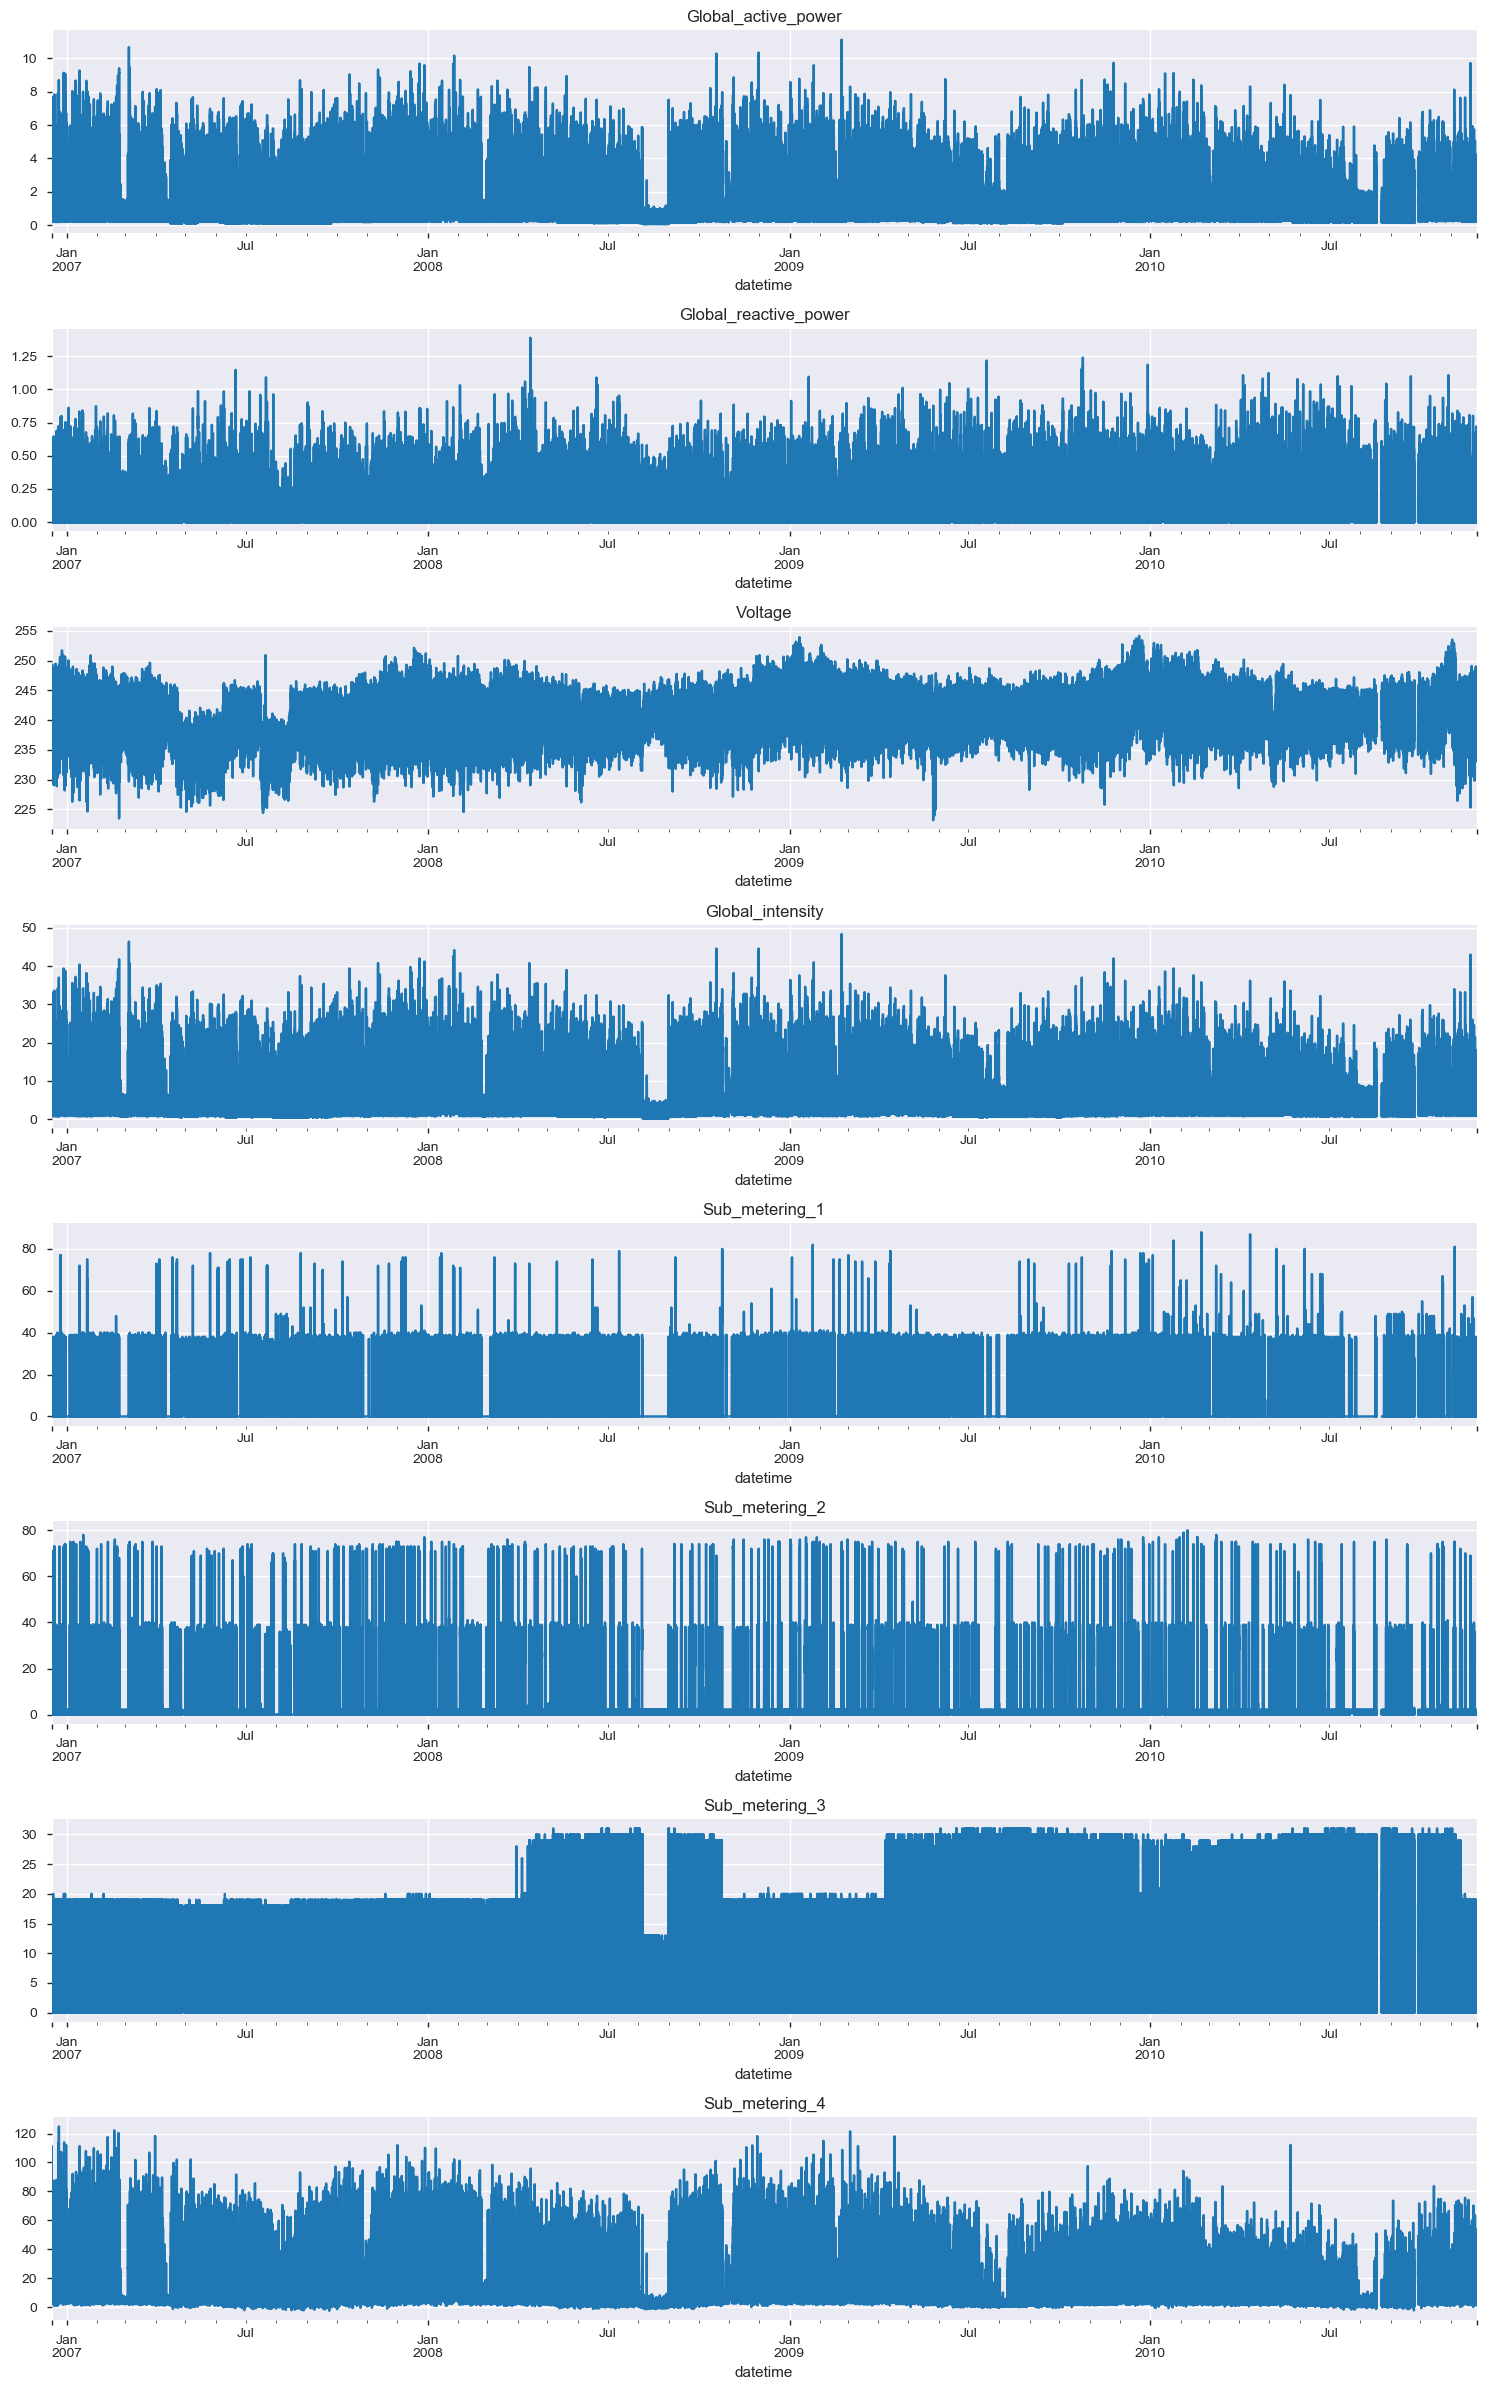

In [15]:
nrows =  len(df.columns)

fig, axes = plt.subplots(nrows = nrows, figsize=(15, 3*nrows))
axes = axes.ravel()

for i,col in enumerate(df.columns):
    df[col].plot(ax=axes[i])
    axes[i].set_title(col)

fig.tight_layout()

### Interesting!
#### There are some periodic dips in the power usage data in almost all of the summers, probably due to vacationing/absence from the house.

#### Submeterings 1 and 2 appear to have a background level, with periodic spikes.

#### Submetering 3 has an obvious bimodality!

### Let's look at the daily averaged data, as this will make the global trends more obvious:

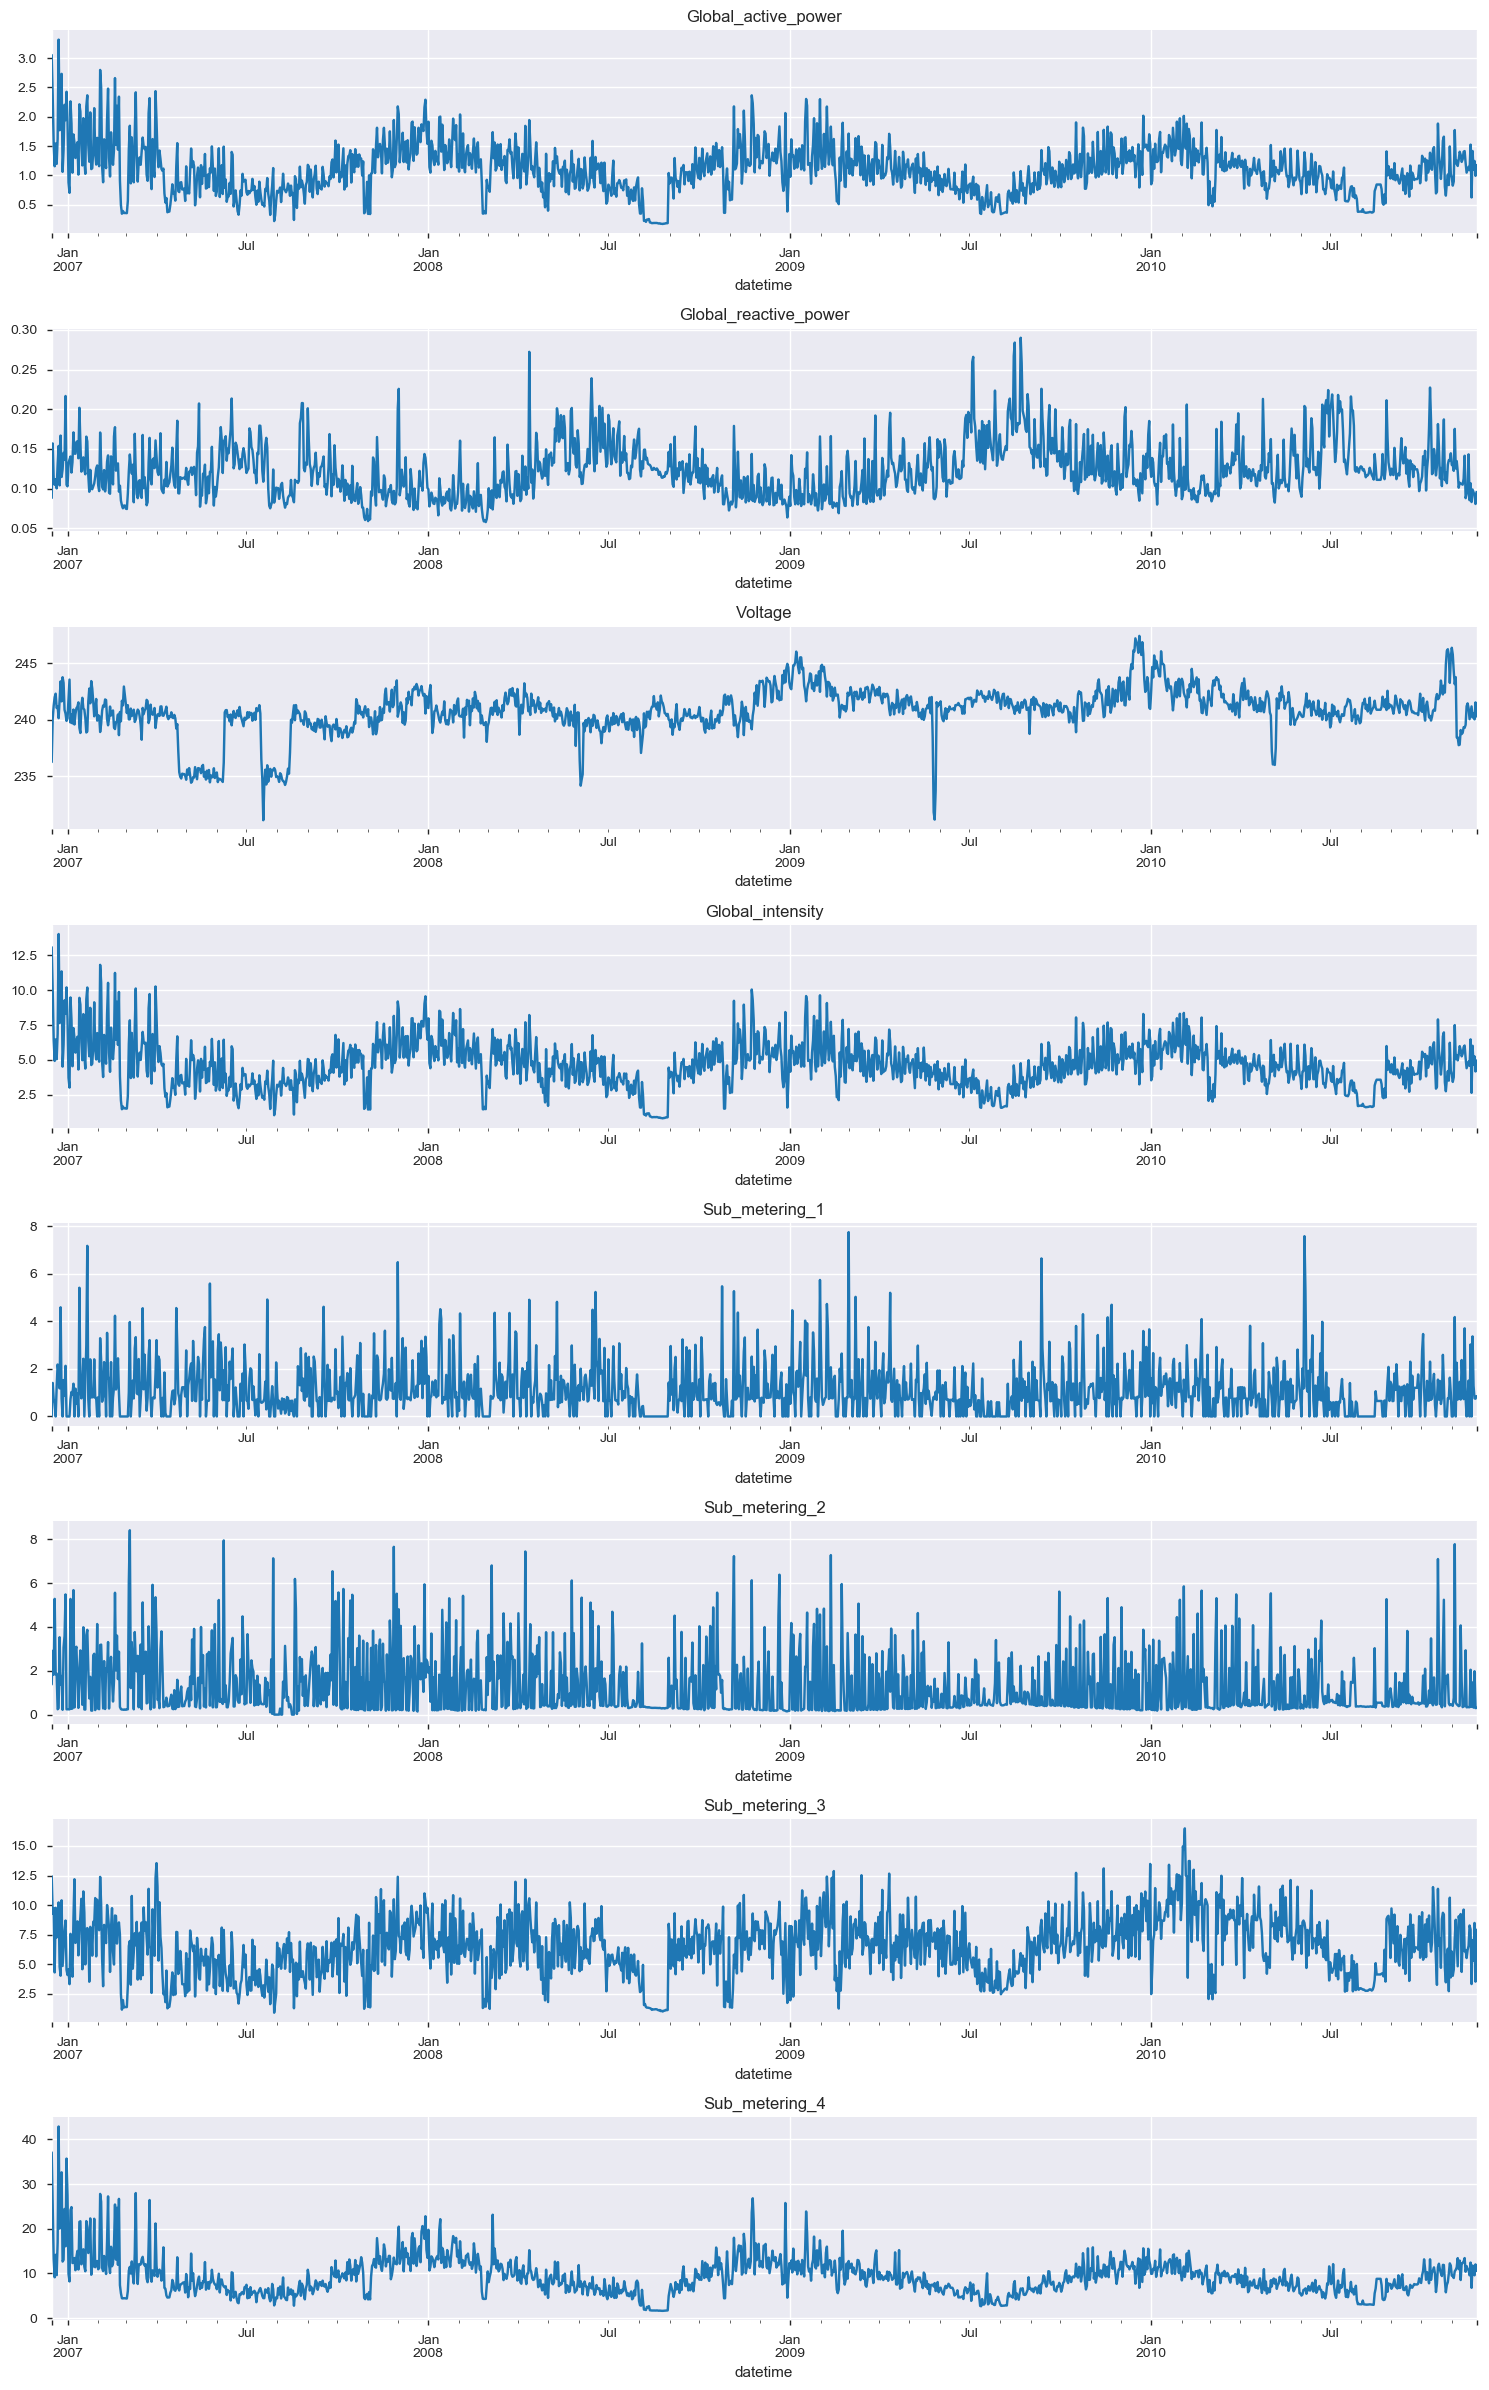

In [16]:
nrows =  len(data_daily.columns)

fig, axes = plt.subplots(nrows = nrows, figsize=(15, 3*nrows))
axes = axes.ravel()

for i,col in enumerate(data_daily.columns):
    data_daily[col].plot(ax=axes[i])
    axes[i].set_title(col)

fig.tight_layout()

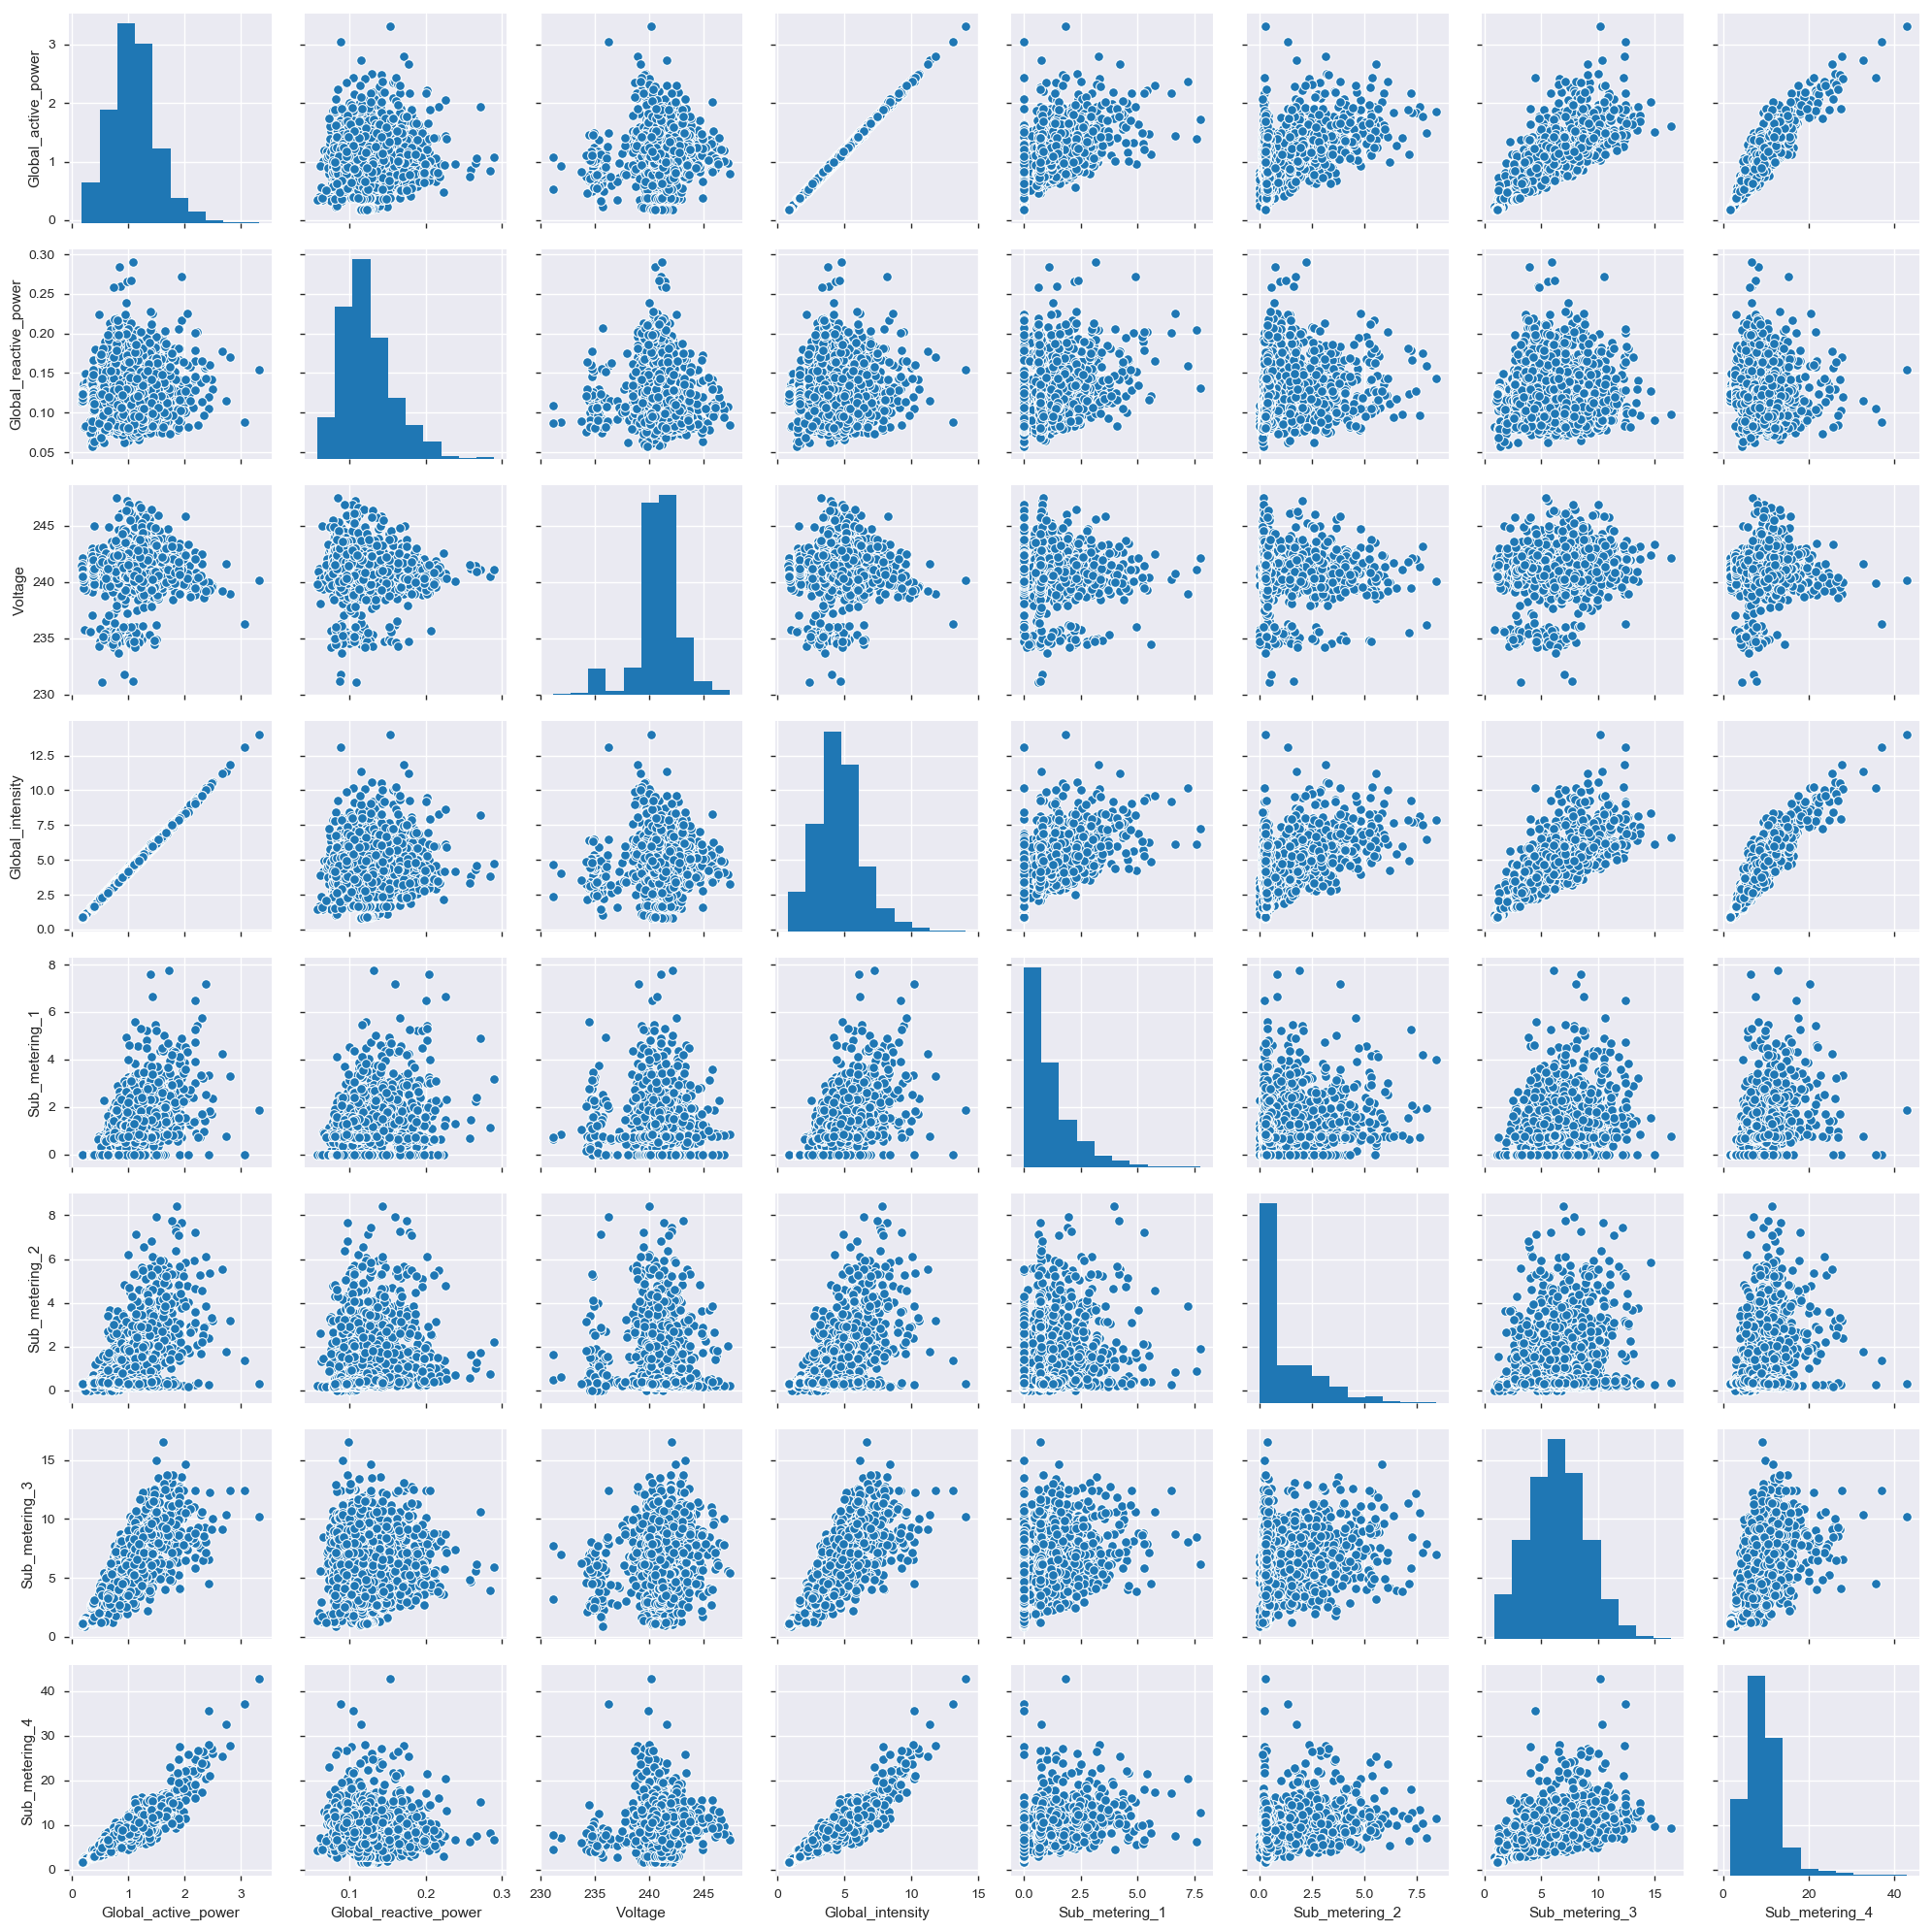

In [17]:
sns.pairplot(data_daily)

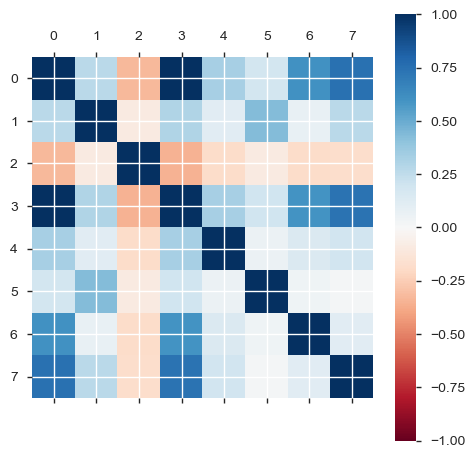

In [18]:
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='RdBu')
plt.colorbar()
plt.show()

### For the modeling part, we will have to drop "Global_intensity". Some other features are strongly correlated, e.g. "Sub_metering3" and "Sub_metering4" with "Global_active_power". Some other features are anticorrelated. However, I would keep all, except "Global_intensity", as they contribute to the variance.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtypes: float64(8)
memory usage: 142.5 MB


In [50]:
#data_monthly = df.resample('M').sum()

In [58]:

df['weekday'] = pd.DatetimeIndex(df.index).weekday_name
df['week'] = pd.DatetimeIndex(df.index).week
df['month'] = pd.DatetimeIndex(df.index).month
df['quarter'] = pd.DatetimeIndex(df.index).quarter
df['year'] = pd.DatetimeIndex(df.index).year


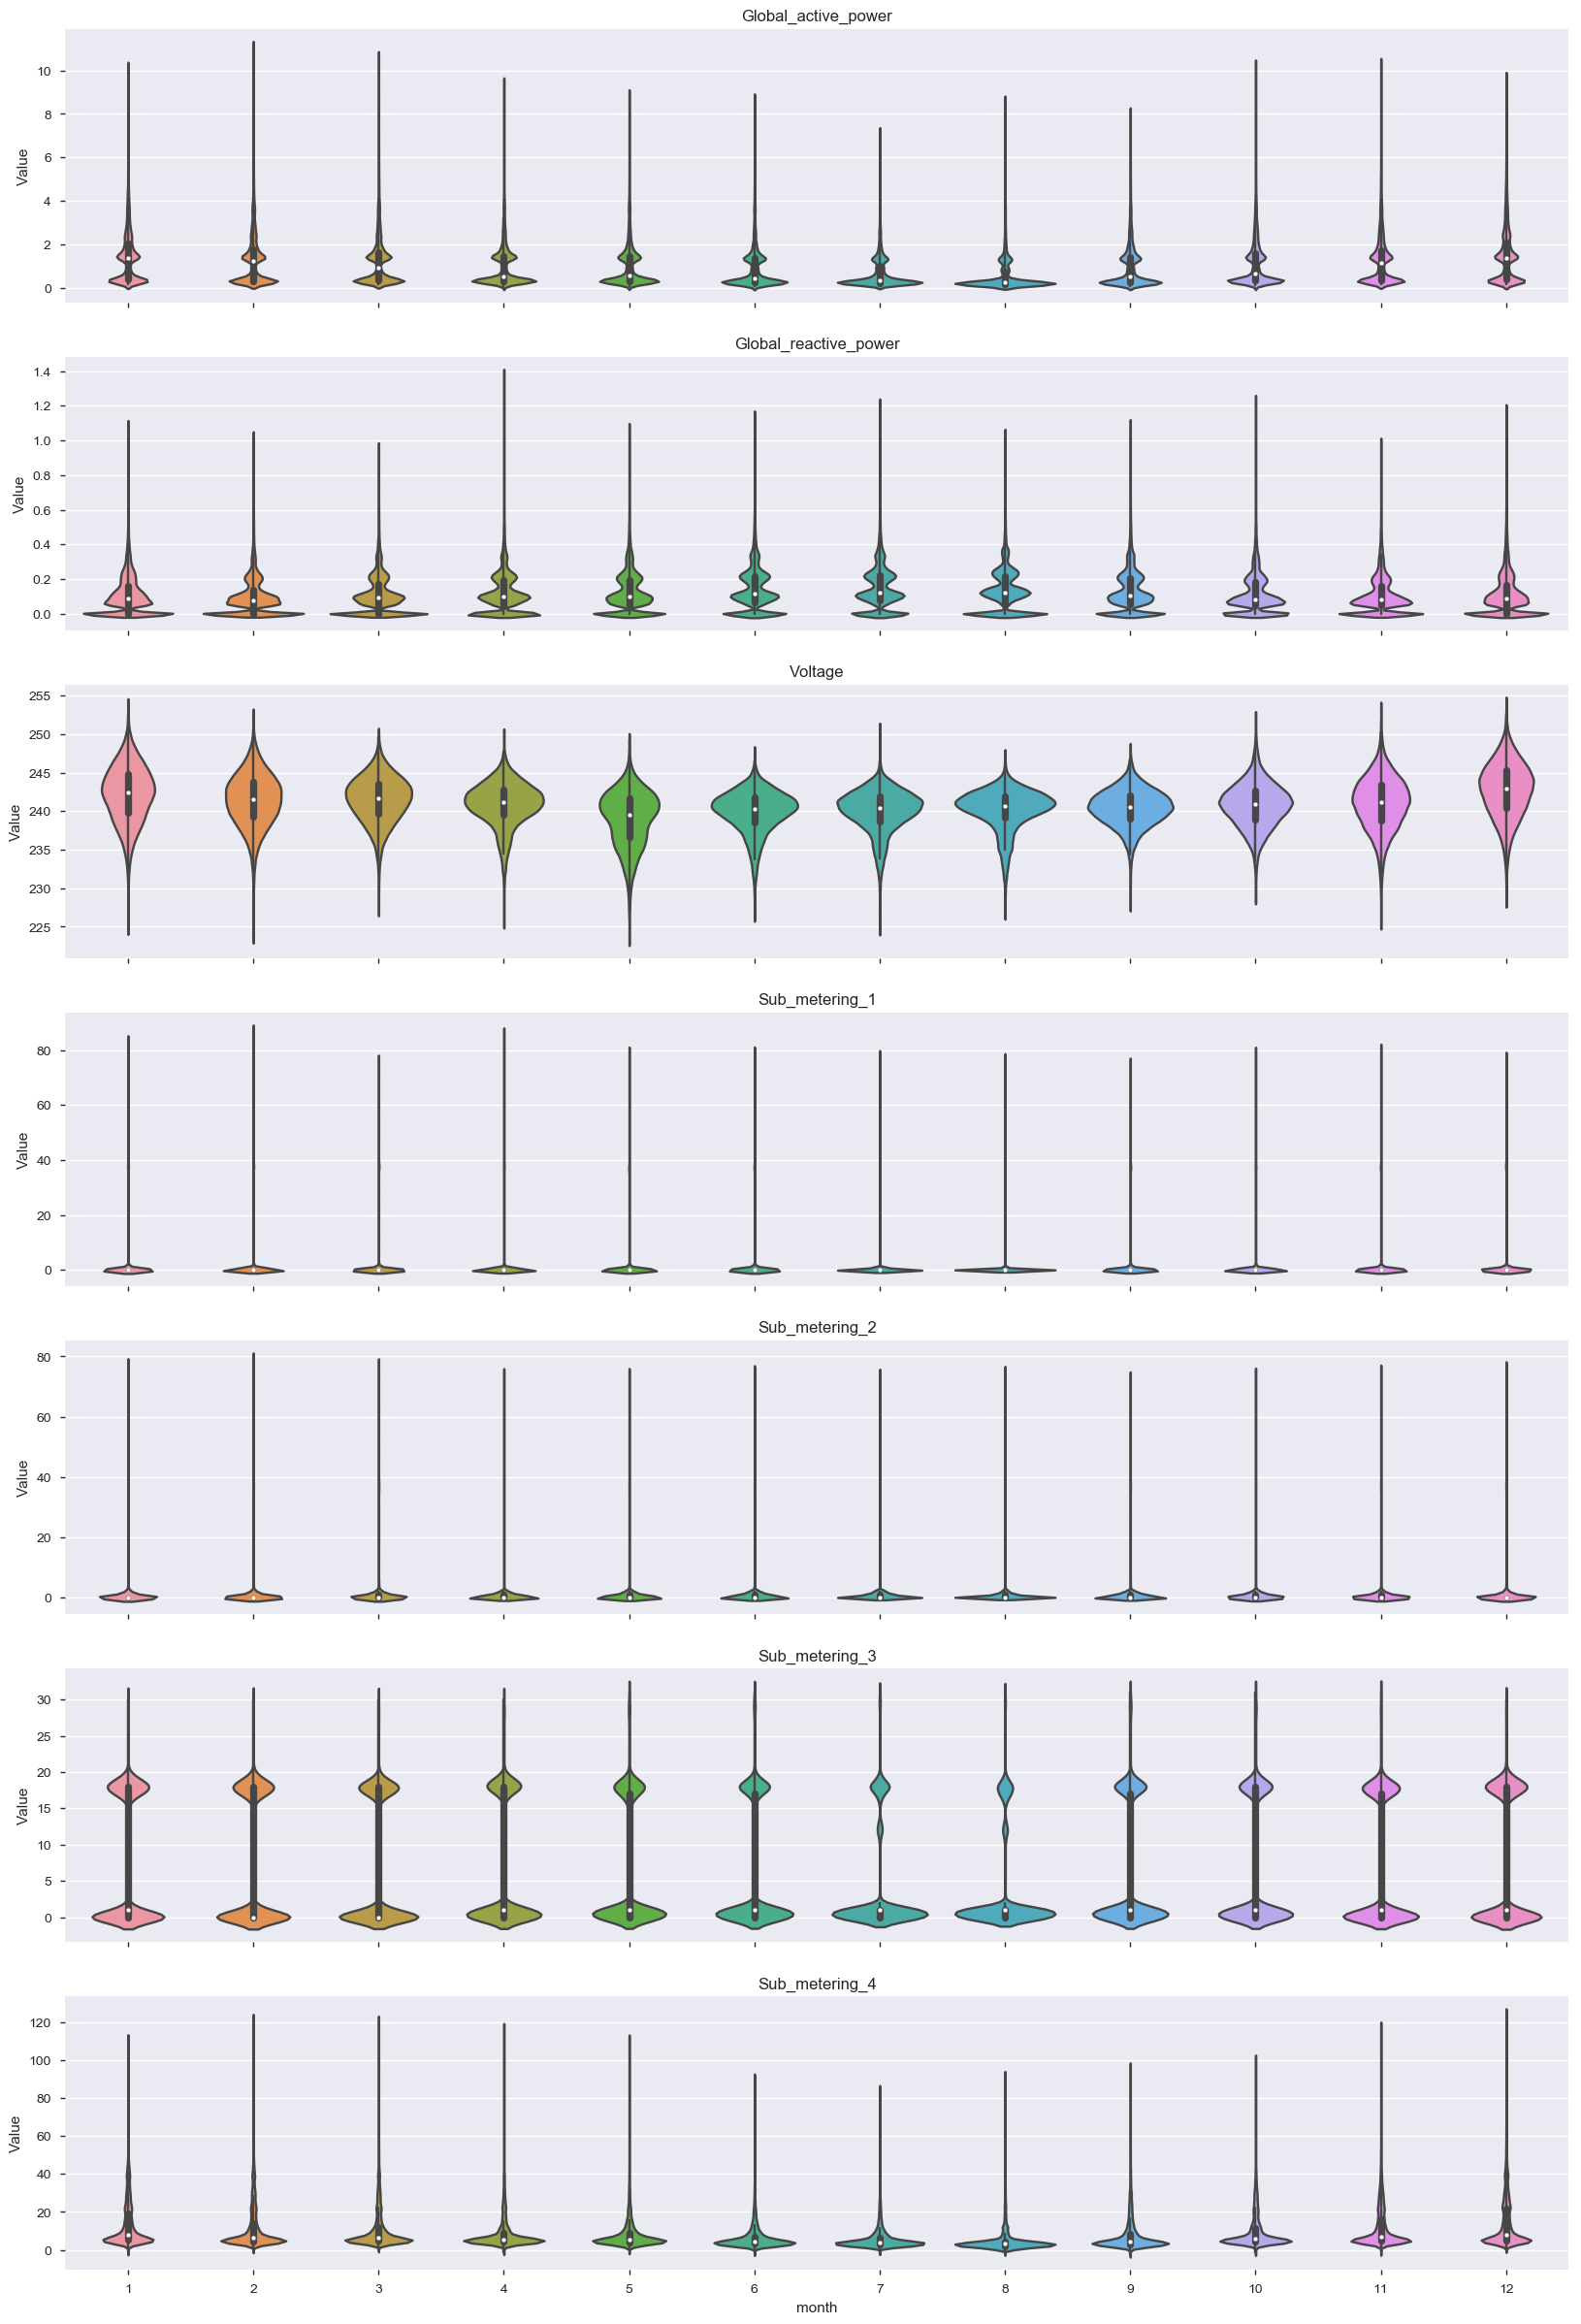

In [22]:
fig, axes = plt.subplots(7, 1, figsize=(20, 30), sharex=True)
for name, ax in zip(['Global_active_power', 'Global_reactive_power','Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4'], axes):
    sns.violinplot(data=df, x='month', y=name, ax=ax)
    ax.set_ylabel('Value')
    ax.set_title(name)
# Keep the x-axis label for the bottom subplot only
    if ax != axes[-1]:
        ax.set_xlabel('')

### Some observations:

#### The distribution of Global_active_power, Global_reactive_power and Sub_metering3 appear to be bi-modal or multimodal, meaning it looks like they have two or more mean groups of observations. In case Sub_metering3, this is clearly due to the usage of either the AC system, or the water heater, each of them operating at different power.

#### The distribution of Voltage over most months appear Gaussian, with the exception of elongated tails towards smaller voltages for the summer months. This is probably the result of voltage drops due to power usage spikes.

#### As for Sub_metering1 and Sub_metering2, those are strongly right-skewed, with means close to zero, and very long tails. This is probably due to the fact that the kitchen and laundry room appliances are turned off most of the time (large number of zero values), and each of the devices is being used couple of times a day/week.

#### Overall, there are some seasonality trends as also visible from the line plots we made earlier.

## Let's use Prophet on the weekly averaged data to predict the trends for the next year!

#### I use the weekly averaged data as it provides a good enough granularity to capture the main trends. I am trying to predict several months or even years ahead, and I found this worked best for that purpose. However, if we are trying to predict days, weeks, or a couple of months ahead, we would use the hourly or daily data.

In [33]:
data_daily.head()

Global_active_power  Global_reactive_power   Voltage  \
datetime                                                           
2006-12-16               3.0535                 0.0882  236.2438   
2006-12-17               2.3545                 0.1569  240.0870   
2006-12-18               1.5304                 0.1124  241.2317   
2006-12-19               1.1571                 0.1048  241.9993   
2006-12-20               1.5457                 0.1118  242.3081   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16           13.0828          0.0000          1.3788         12.4394   
2006-12-17            9.9990          1.4118          2.9076          9.2646   
2006-12-18            6.4217          0.7382          1.8201          9.7347   
2006-12-19            4.9264          0.5826          5.2792          4.3035   
2006-12-20            6.4674          0.0000          1.8389          9.7660   

            Sub_metering_4  week  month  quarter  year  
datetime                                                
2006-12-16         37.0731    50     12        4  2006  
2006-12-17         25.6574    50     12        4  2006  
2006-12-18         13.2142    51     12        4  2006  
2006-12-19          9.1194    51     12        4  2006  
2006-12-20         14.1561    51     12        4  2006

In [115]:
#Drop the irrelevant columns
data_hourly2 = data_hourly.drop(['Global_intensity', 'week','month','quarter','year'], axis=1)
data_daily2 = data_daily.drop(['Global_intensity', 'week','month','quarter','year'], axis=1)
data_weekly2 = data_weekly.drop(['Global_intensity', 'week','month','quarter','year'], axis=1)
data_monthly2 = data_monthly.drop(['Global_intensity', 'week','month','quarter','year'], axis=1)


### Let's refit these data with facebook prophet and see what the rmse and future forecasting trends look like.

note the pd.plotting.register_matplotlib_converters() call which is needed to fix some incompatiblities with pandas and fb prophet for matplotlib plotting. This will be unneccessary in a future pandas version that will remove the matplitlib converter registration that pandas is currently doing on import.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-01-07 00:00:00 and 2010-06-01 00:00:00


Global_active_power


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2009-01-11  1.290489    0.905709    1.701044  1.277286 2009-01-07
1 2009-01-18  1.266314    0.890136    1.621347  1.622380 2009-01-07
2 2009-01-25  1.357164    0.979201    1.738860  1.326355 2009-01-07
3 2009-02-01  1.453179    1.074796    1.812125  1.459453 2009-01-07
4 2009-02-08  1.412392    1.055157    1.789436  1.482589 2009-01-07
  horizon       mse      rmse       mae      mape  coverage
0 18 days  0.028584  0.169069  0.132590  0.127656  0.934783
1 19 days  0.031059  0.176235  0.138696  0.133912  0.934783
2 20 days  0.034144  0.184781  0.147017  0.144027  0.934783
3 21 days  0.034823  0.186610  0.148044  0.142438  0.942029
4 22 days  0.033435  0.182853  0.146353  0.136794  0.956522
     horizon       mse      rmse       mae      mape  coverage
158 176 days  0.035868  0.189388  0.154627  0.154191  0.956522
159 177 days  0.035442  0.188260  0.152114  0.152003  0.956522
160 178 days  0.035153  0.187492  0.151091 

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-01-07 00:00:00 and 2010-06-01 00:00:00


Global_reactive_power


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2009-01-11  0.109524    0.077645    0.139200  0.092353 2009-01-07
1 2009-01-18  0.109122    0.077213    0.137116  0.102903 2009-01-07
2 2009-01-25  0.107001    0.077877    0.136209  0.093337 2009-01-07
3 2009-02-01  0.103635    0.073768    0.134461  0.098961 2009-01-07
4 2009-02-08  0.100098    0.069939    0.130466  0.094139 2009-01-07
  horizon       mse      rmse       mae      mape  coverage
0 18 days  0.000692  0.026315  0.018053  0.136363  0.869565
1 19 days  0.000724  0.026910  0.018779  0.142455  0.847826
2 20 days  0.000768  0.027709  0.019979  0.152047  0.826087
3 21 days  0.000764  0.027642  0.019840  0.150170  0.833333
4 22 days  0.000731  0.027030  0.018806  0.140813  0.847826
     horizon       mse      rmse       mae      mape  coverage
158 176 days  0.001227  0.035032  0.028466  0.204512  0.586957
159 177 days  0.001260  0.035490  0.028799  0.206552  0.586957
160 178 days  0.001259  0.035481  0.028906 

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-01-07 00:00:00 and 2010-06-01 00:00:00


Voltage


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper           y     cutoff
0 2009-01-11  242.357527  240.385344  244.296937  245.084181 2009-01-07
1 2009-01-18  242.024671  239.968517  243.984303  243.494148 2009-01-07
2 2009-01-25  241.917823  239.984138  243.923898  243.314467 2009-01-07
3 2009-02-01  242.021479  240.033681  244.197674  243.573241 2009-01-07
4 2009-02-08  242.153663  240.062609  244.143346  243.773390 2009-01-07
  horizon       mse      rmse       mae      mape  coverage
0 18 days  1.716020  1.309970  1.051135  0.004344  0.891304
1 19 days  1.640489  1.280816  1.009944  0.004174  0.891304
2 20 days  1.848510  1.359599  1.058078  0.004372  0.869565
3 21 days  1.863542  1.365116  1.062365  0.004391  0.855072
4 22 days  1.817282  1.348066  1.061443  0.004389  0.869565
     horizon       mse      rmse       mae      mape  coverage
158 176 days  2.424516  1.557086  1.283127  0.005306  0.847826
159 177 days  2.597496  1.611675  1.320195  0.005460  0.826087
160 178 days  2.562

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-01-07 00:00:00 and 2010-06-01 00:00:00


Sub_metering_1


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2009-01-11  1.296769    0.525776    2.074554  1.573214 2009-01-07
1 2009-01-18  1.369743    0.650812    2.179320  1.992560 2009-01-07
2 2009-01-25  1.422900    0.656858    2.137436  1.330456 2009-01-07
3 2009-02-01  1.377630    0.641830    2.100918  1.812103 2009-01-07
4 2009-02-08  1.187446    0.445885    1.900421  1.702877 2009-01-07
  horizon       mse      rmse       mae  coverage
0 18 days  0.266357  0.516098  0.412772  0.869565
1 19 days  0.274290  0.523727  0.417982  0.869565
2 20 days  0.305146  0.552400  0.441271  0.847826
3 21 days  0.322896  0.568240  0.462208  0.826087
4 22 days  0.319097  0.564886  0.460363  0.826087
     horizon       mse      rmse       mae  coverage
158 176 days  0.213547  0.462112  0.377338  0.934783
159 177 days  0.205952  0.453819  0.369293  0.934783
160 178 days  0.200478  0.447748  0.355154  0.934783
161 179 days  0.191571  0.437688  0.341826  0.934783
162 180 days  0.183430  0.4

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-01-07 00:00:00 and 2010-06-01 00:00:00


Sub_metering_2


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2009-01-11  1.005760    0.106164    1.854359  1.444048 2009-01-07
1 2009-01-18  0.895068    0.032463    1.703546  1.421230 2009-01-07
2 2009-01-25  0.971965    0.141964    1.844332  1.379464 2009-01-07
3 2009-02-01  1.076247    0.267049    1.928694  1.524107 2009-01-07
4 2009-02-08  1.041547    0.203335    1.919354  1.324405 2009-01-07
  horizon       mse      rmse       mae      mape  coverage
0 18 days  0.181749  0.426320  0.351716  0.314223  0.934783
1 19 days  0.197992  0.444963  0.367333  0.323172  0.913043
2 20 days  0.209719  0.457951  0.380097  0.332947  0.913043
3 21 days  0.209969  0.458224  0.383598  0.354094  0.934783
4 22 days  0.205764  0.453613  0.376841  0.345133  0.934783
     horizon       mse      rmse       mae      mape  coverage
158 176 days  0.278563  0.527791  0.405020  0.343575  0.913043
159 177 days  0.306710  0.553814  0.425018  0.365811  0.891304
160 178 days  0.311058  0.557725  0.436578 

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-01-07 00:00:00 and 2010-06-01 00:00:00


Sub_metering_3


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2009-01-11  6.621954    4.192803    8.906262  6.833036 2009-01-07
1 2009-01-18  6.815932    4.631981    9.135368  9.076389 2009-01-07
2 2009-01-25  7.517224    5.214594    9.851062  7.317758 2009-01-07
3 2009-02-01  8.184929    5.937322   10.360653  7.475000 2009-01-07
4 2009-02-08  8.089033    5.966424   10.329658  9.881845 2009-01-07
  horizon       mse      rmse       mae      mape  coverage
0 18 days  1.603525  1.266304  0.998749  0.149861  0.934783
1 19 days  1.640198  1.280702  1.013285  0.152362  0.934783
2 20 days  1.793736  1.339304  1.055295  0.160305  0.913043
3 21 days  1.812430  1.346265  1.077197  0.157377  0.920290
4 22 days  1.718660  1.310977  1.070677  0.143180  0.934783
     horizon       mse      rmse       mae      mape  coverage
158 176 days  1.962306  1.400823  1.192972  0.176571  0.913043
159 177 days  2.012300  1.418555  1.206298  0.178389  0.913043
160 178 days  2.023229  1.422402  1.213746 

INFO:fbprophet:Making 18 forecasts with cutoffs between 2009-01-07 00:00:00 and 2010-06-01 00:00:00


Sub_metering_4
          ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2009-01-11  12.466221    8.849793   15.782179  11.437801 2009-01-07
1 2009-01-18  11.912441    8.430244   15.365437  14.549491 2009-01-07
2 2009-01-25  12.603383    9.163154   15.967516  12.078231 2009-01-07
3 2009-02-01  13.512506    9.818535   16.900246  13.513003 2009-01-07
4 2009-02-08  13.214281    9.596053   16.743820  11.800694 2009-01-07
  horizon       mse      rmse       mae      mape  coverage
0 18 days  2.285466  1.511776  1.118235  0.126992  0.978261
1 19 days  2.509479  1.584133  1.199345  0.137418  0.978261
2 20 days  2.539226  1.593495  1.217488  0.144517  0.978261
3 21 days  2.594019  1.610596  1.243043  0.146821  0.978261
4 22 days  2.548630  1.596443  1.217502  0.143339  0.978261
     horizon       mse      rmse       mae      mape  coverage
158 176 days  4.105532  2.026211  1.581328  0.198651  0.913043
159 177 days  4.054828  2.013660  1.545143  0.195106  0.913043
160 178 days  3.

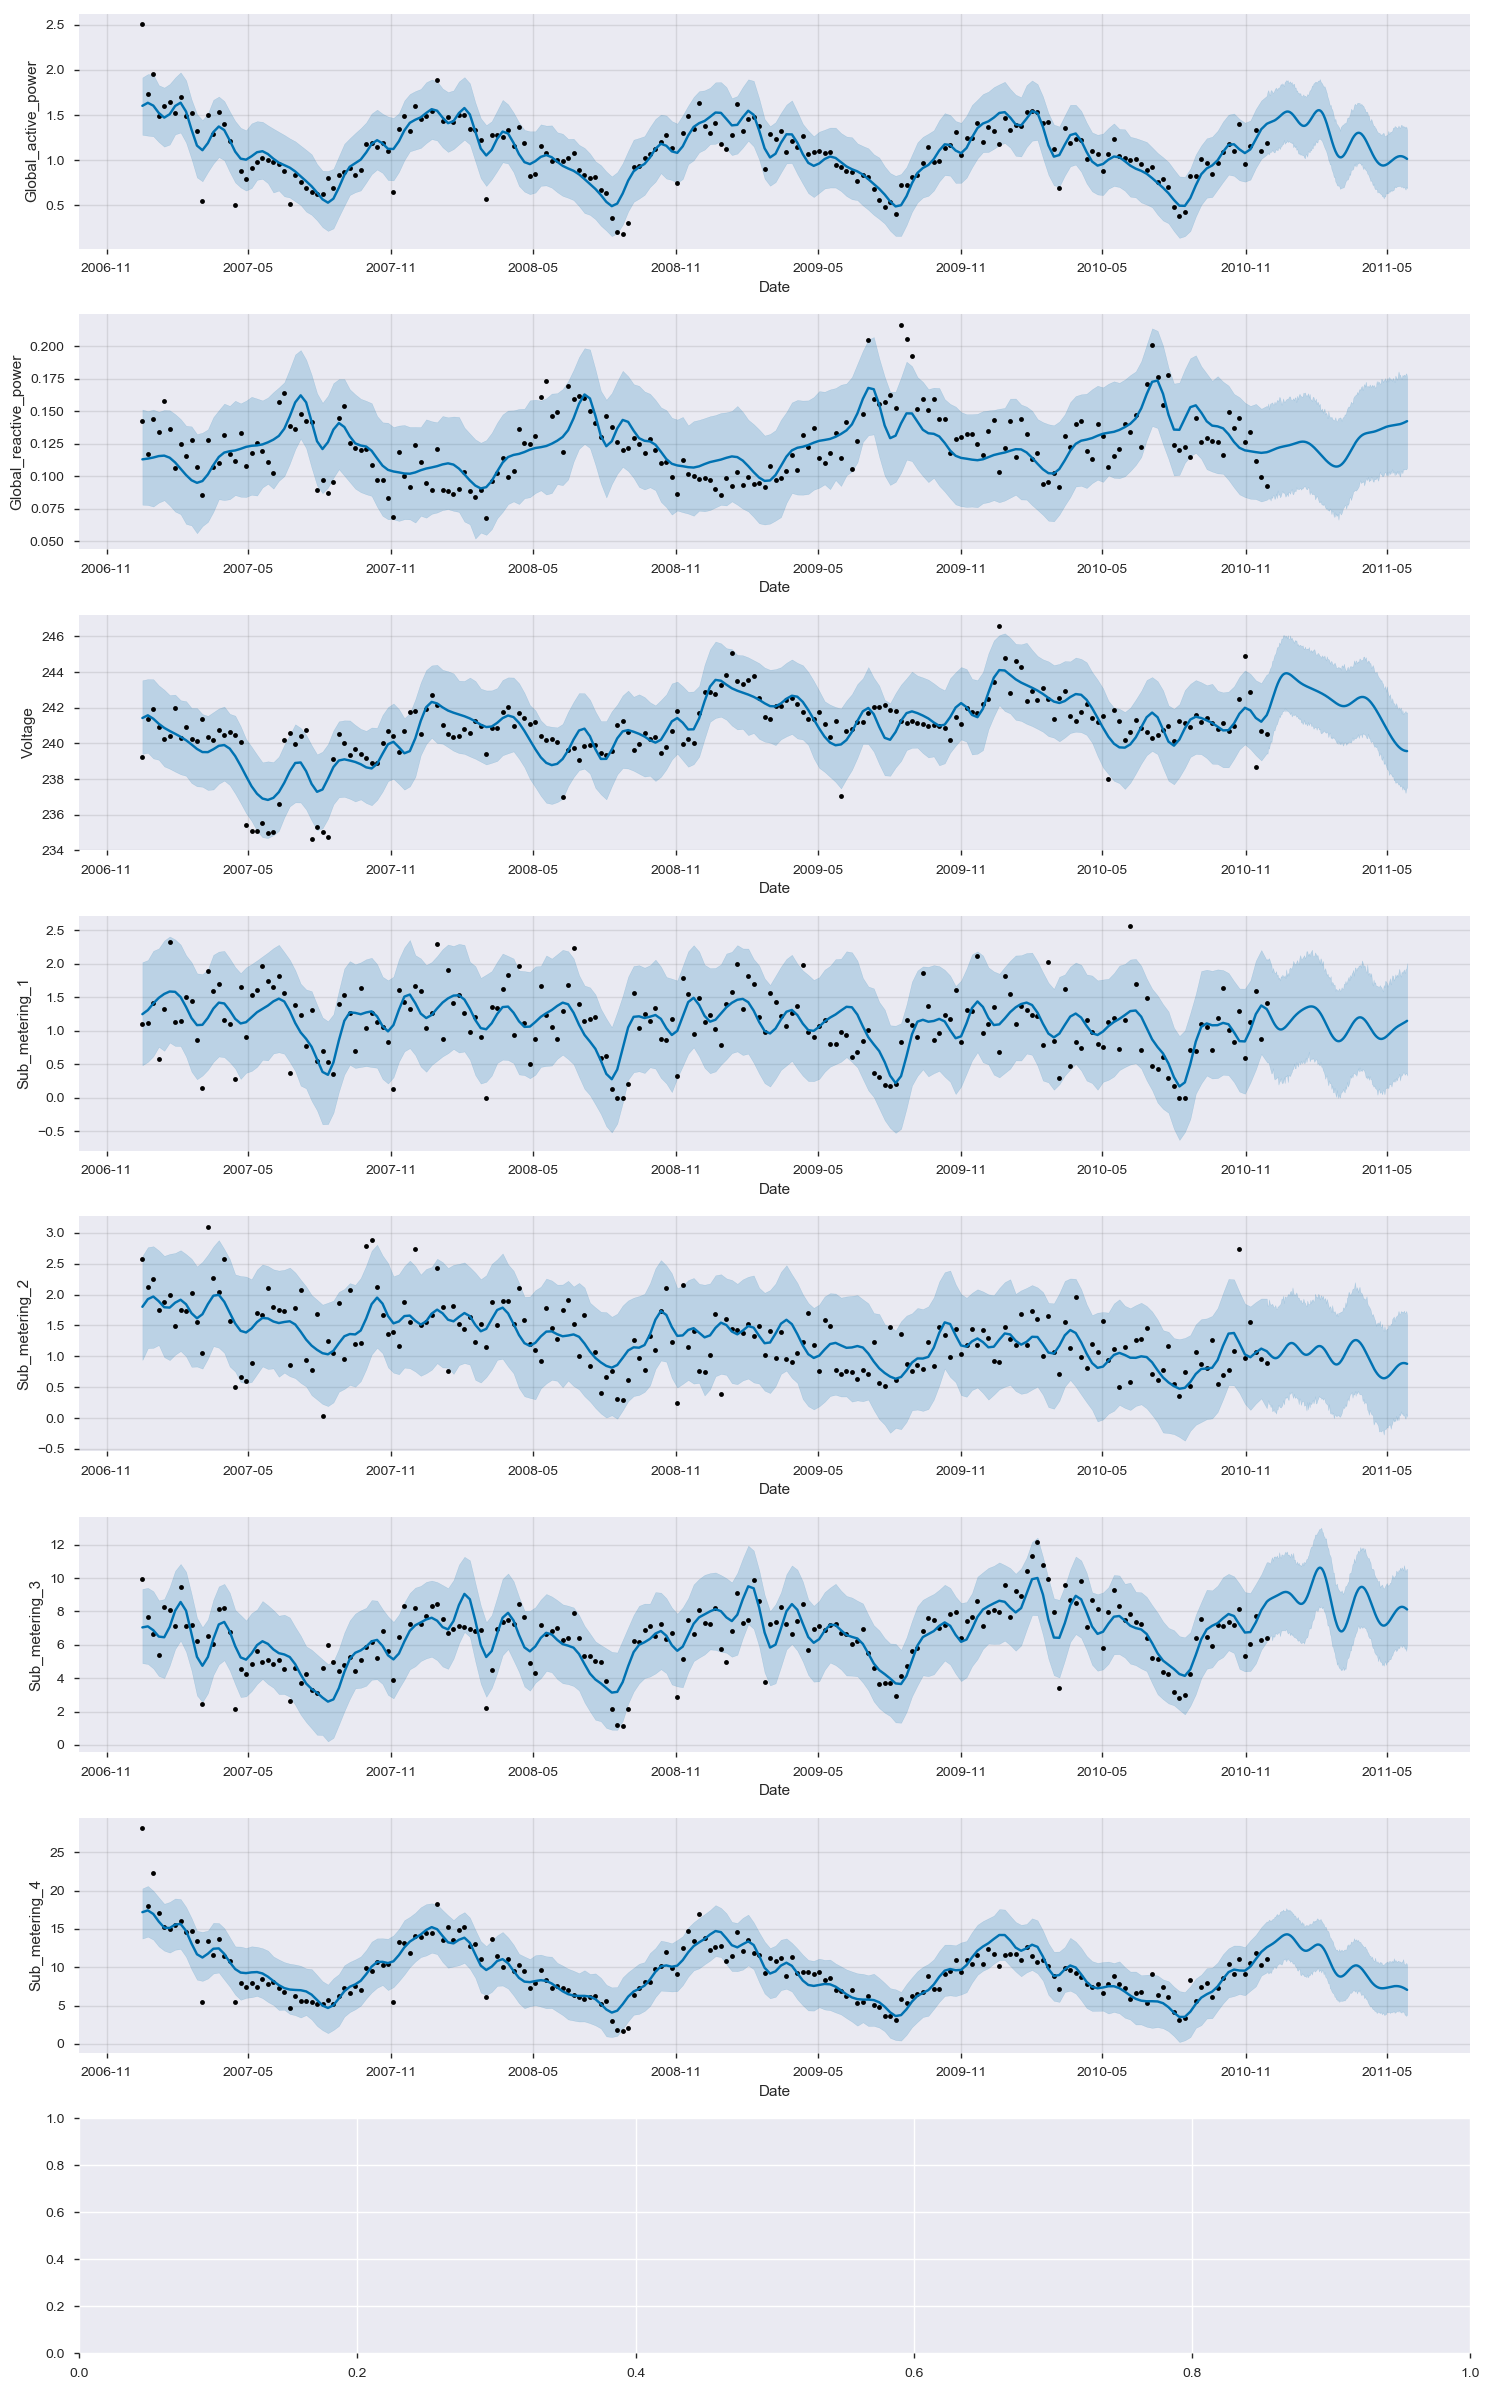

In [101]:
pd.plotting.register_matplotlib_converters()
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_cross_validation_metric


fig, axes = plt.subplots(nrows = nrows, figsize=(15, 3*nrows))
axes = axes.ravel()

#print(  (  (data_daily2.reset_index())[['datetime','Voltage']]   )  .head())

for i,feature in enumerate(data_weekly2.columns):
    df2 = (
        data_weekly2.reset_index()[['datetime', feature]]
            .rename(columns={
                'datetime': 'ds',
                feature: 'y'
            })
    )
    #print(feature)
    
    
    m = Prophet(interval_width=0.95) #set the uncertainty interval to 95% (the Prophet default is 80%)
    m.fit(df2)
    future = m.make_future_dataframe(periods=int(180))
    forecast = m.predict(future)
    print(feature)
    m.plot(forecast, ax = axes[i], xlabel='Date', ylabel = feature, uncertainty=True)
    #print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    df_cv = cross_validation(m, initial='730 days', period='30 days', horizon = '180 days')
    #df_cv = cross_validation(m, horizon = '180 days') # Trying the default settings
    df_p = performance_metrics(df_cv) # calculating some performance metrics
    print(df_cv.head())
    print(df_p.head())
    print(df_p.tail())
    #fig = plot_cross_validation_metric(df_cv, metric='mape') # plotting MAPE 



### Some comments:
##### The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

### Results:
#### For most of the features, the mean absolute percentage error (MAPE) is smaller than 20%. This is a good result, which can be improved by tuning some of the hyperparameters and cleaning the data by removing outliers, or using different schemes for averaging and dealing with the missing values (e.g., interpolation ).

#### If I had more time, I would take more time to investigate the performance metrics more carefully, and compare this forecasting model with others, some possibilities are ARIMA/SARIMA, and LSTMs.


### Let's try to predict 3 years into the future

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Global_active_power


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Global_reactive_power


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Voltage


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Sub_metering_1


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Sub_metering_2


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Sub_metering_3
Sub_metering_4


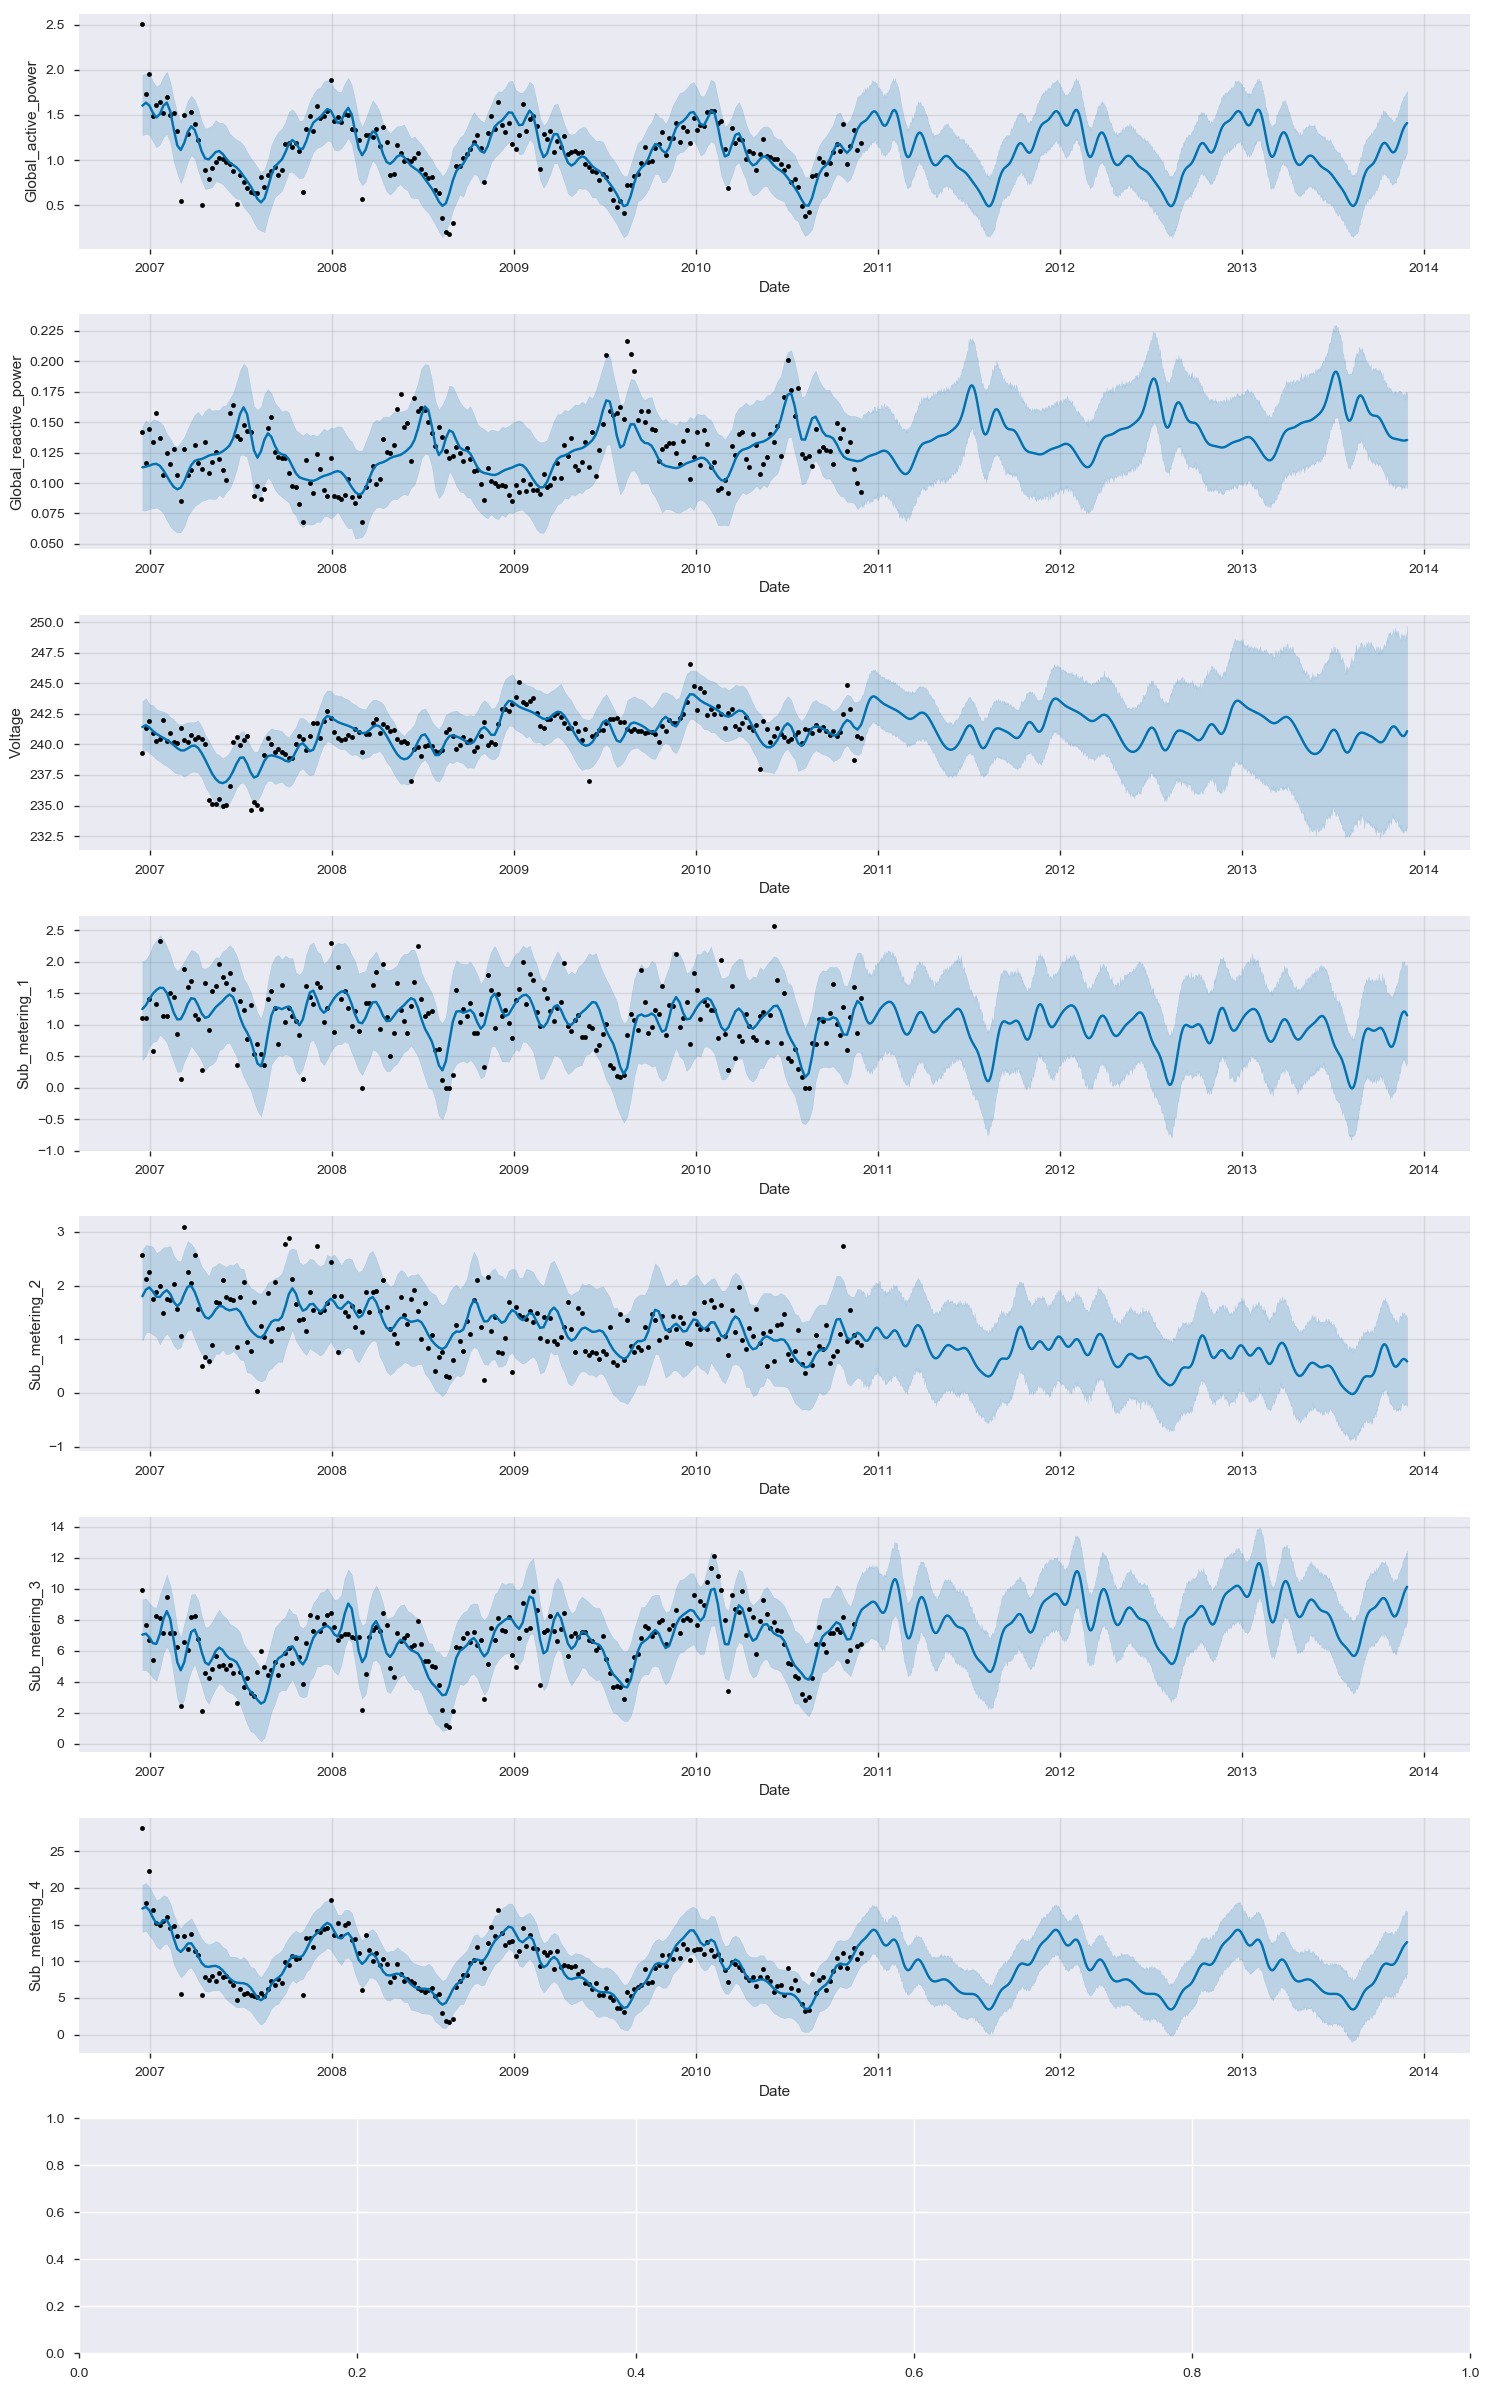

In [119]:
fig, axes = plt.subplots(nrows = nrows, figsize=(15, 3*nrows))
axes = axes.ravel()

#print(  (  (data_weekly2.reset_index())[['datetime','Voltage']]   )  .head())

for i,feature in enumerate(data_weekly2.columns):
    df2 = (
        data_weekly2.reset_index()[['datetime', feature]]
            .rename(columns={
                'datetime': 'ds',
                feature: 'y'
            })
    )
    #print(feature)
    
    
    m = Prophet(interval_width=0.95) #set the uncertainty interval to 95% (the Prophet default is 80%)
    m.fit(df2)
    future = m.make_future_dataframe(periods=int(1096))
    forecast = m.predict(future)
    print(feature)
    m.plot(forecast, ax = axes[i], xlabel='Date', ylabel = feature, uncertainty=True)
    #print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    #df_cv = cross_validation(m, initial='1096 days', period='30 days', horizon = '90 days')
    #df_cv = cross_validation(m, horizon = '14 days') # Trying the default settings
    #df_p = performance_metrics(df_cv) # calculating some performance metrics
    #print(df_cv.head())
    #print(df_p.head())
    #print(df_p.tail())

### More results:

#### This forecasting model could be very useful for predicting future monthly, seasonal or yearly trends for power usage of a household. In this particular example, we see that there are some general trends in the usage of the different household appliances. In particular, there is an increase of the usage of the AC and heating systems, which could be related to regional and global weather fluctuations. There's also a decrease in usage of the laundry facilities, maybe due to kids at the household growind up?